# Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
regr = linear_model.LinearRegression()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Reading The Dataset

In [2]:
original_data = pd.read_excel("Data_file.xlsx", skiprows=2)
test_data = pd.read_excel("Test_data_file.xlsx", usecols="A:L")
data = original_data

In [3]:
data.drop('S.No.', axis = 1, inplace = True)

In [4]:
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [5]:
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729


# Understanding dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [7]:
data.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


# Understanding test dataset

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   College_T1            1338 non-null   int64  
 4   College_T2            1338 non-null   int64  
 5   Role_Manager          1338 non-null   int64  
 6   City_Metro            1338 non-null   int64  
 7   previous CTC          1338 non-null   int64  
 8   previous job changes  1338 non-null   int64  
 9   Graduation marks      1338 non-null   int64  
 10  Exp                   1338 non-null   int64  
 11  Actual CTC            1338 non-null   float64
dtypes: float64(1), int64(8), object(3)
memory usage: 125.6+ KB


In [9]:
test_data.describe()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.485052,0.272048,0.204783,0.505232,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,0.499963,0.445181,0.403694,0.500160,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,0.000000,0.000000,0.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,0.000000,0.000000,0.000000,0.000000,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,0.000000,0.000000,0.000000,1.000000,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,1.000000,1.000000,0.000000,1.000000,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,1.000000,1.000000,1.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.994271


# Turning Categorical Variable to numerical variables

In [10]:
# Finding Categories of categorical Variables
print(data['College'].unique())
print(data['Role'].unique())
print(data['City type'].unique())

['Tier 1' 'Tier 2' 'Tier 3']
['Manager' 'Executive']
['Non-Metro' 'Metro']


In [11]:
data = pd.concat([data, pd.get_dummies(data['College'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Role'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['City type'])], axis=1)
data.drop(['College','Role','City type'], axis=1 , inplace = True)

In [12]:
data

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Tier 1,Tier 2,Tier 3,Executive,Manager,Metro,Non-Metro
0,55523,3,66,19,71406.576531,1,0,0,0,1,0,1
1,57081,1,84,18,68005.870631,0,1,0,1,0,1,0
2,60347,2,52,28,76764.020277,0,1,0,1,0,1,0
3,49010,2,81,33,82092.386880,0,0,1,1,0,1,0
4,57879,4,74,32,73878.097729,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,69712.403655,0,0,1,1,0,1,0
1334,53714,1,67,18,69298.750099,1,0,0,1,0,0,1
1335,61957,1,47,18,66397.770686,0,1,0,1,0,0,1
1336,53203,3,69,21,64044.382949,1,0,0,1,0,0,1


# Analysis and Data Visualization


In [13]:
# Correlational Matrix
data.corr()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Tier 1,Tier 2,Tier 3,Executive,Manager,Metro,Non-Metro
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260,-0.090043,0.232138,-0.135957,-0.021208,0.021208,0.036956,-0.036956
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518,0.037294,0.008599,-0.052387,0.013131,-0.013131,-0.001568,0.001568
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557,0.015750,0.010571,-0.029326,-0.014541,0.014541,0.018550,-0.018550
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569,0.010716,-0.011642,-0.000407,0.025019,-0.025019,-0.020856,0.020856
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000,0.165249,-0.041814,-0.149194,-0.625435,0.625435,0.211258,-0.211258
Tier 1,-0.090043,0.037294,0.015750,0.010716,0.165249,1.000000,-0.593313,-0.549730,0.029292,-0.029292,-0.005669,0.005669
Tier 2,0.232138,0.008599,0.010571,-0.011642,-0.041814,-0.593313,1.000000,-0.346265,-0.068498,0.068498,0.017117,-0.017117
Tier 3,-0.135957,-0.052387,-0.029326,-0.000407,-0.149194,-0.549730,-0.346265,1.000000,0.036945,-0.036945,-0.011156,0.011156
Executive,-0.021208,0.013131,-0.014541,0.025019,-0.625435,0.029292,-0.068498,0.036945,1.000000,-1.000000,-0.076185,0.076185
Manager,0.021208,-0.013131,0.014541,-0.025019,0.625435,-0.029292,0.068498,-0.036945,-1.000000,1.000000,0.076185,-0.076185


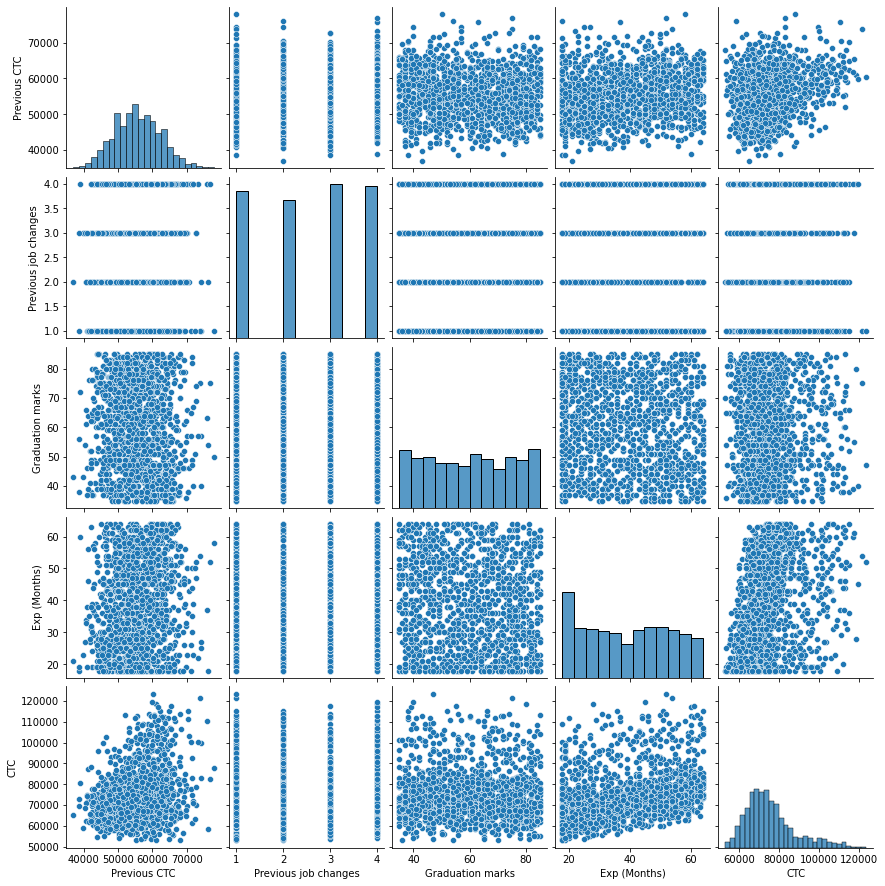

In [14]:
sns.pairplot(original_data, vars=["Previous CTC","Previous job changes","Graduation marks","Exp (Months)","CTC"])

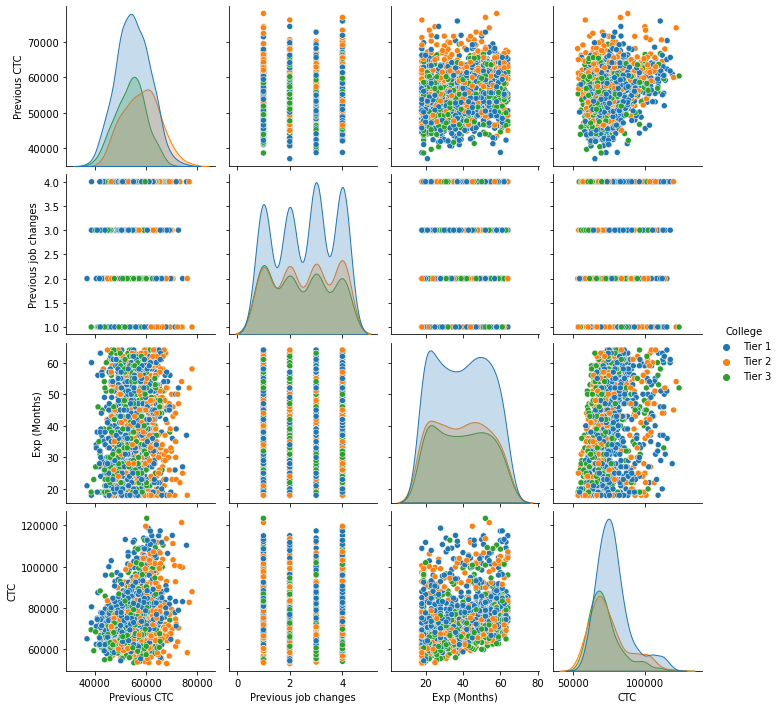

In [15]:
sns.pairplot(original_data, kind="scatter", hue = "College", vars=["Previous CTC","Previous job changes","Exp (Months)","CTC"])

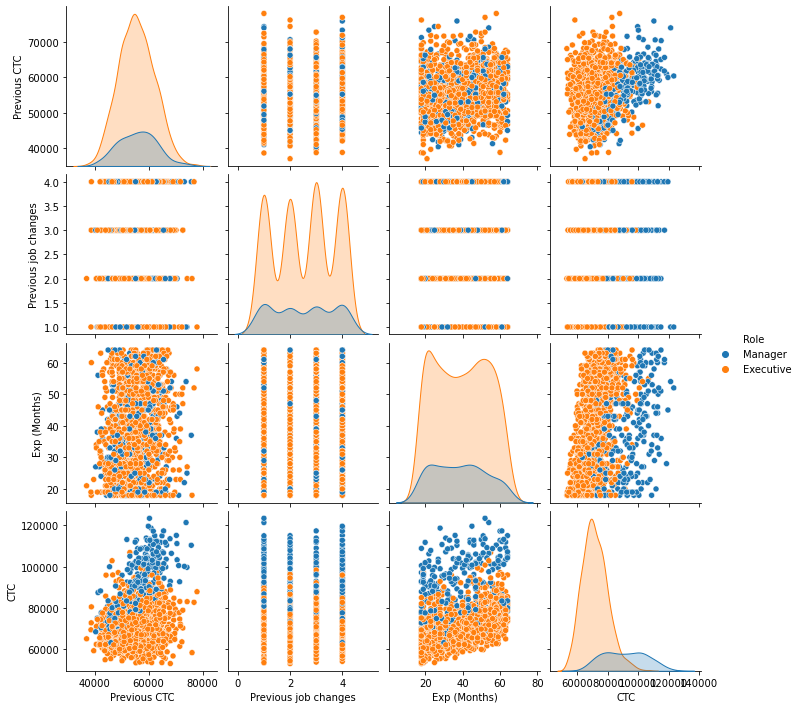

In [16]:
sns.pairplot(original_data, hue = "Role", vars=["Previous CTC","Previous job changes","Exp (Months)","CTC"])

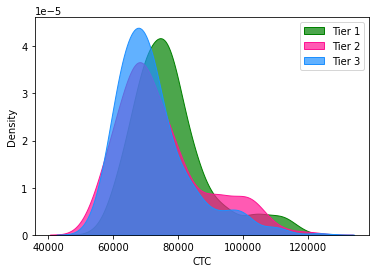

In [17]:
sns.kdeplot(original_data.loc[original_data['College'] == "Tier 1", "CTC"], shade=True, color="g", label="Tier 1", alpha=.7)
sns.kdeplot(original_data.loc[original_data['College'] == "Tier 2", "CTC"], shade=True, color="deeppink", label="Tier 2", alpha=.7)
sns.kdeplot(original_data.loc[original_data['College'] == "Tier 3", "CTC"], shade=True, color="dodgerblue", label="Tier 3", alpha=.7)
plt.legend()
plt.show()

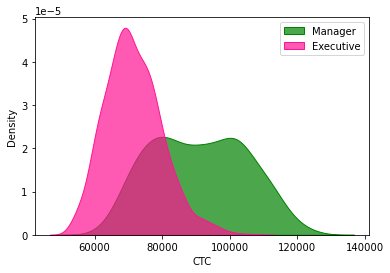

In [18]:
sns.kdeplot(original_data.loc[original_data['Role'] == "Manager", "CTC"], shade=True, color="g", label="Manager", alpha=.7)
sns.kdeplot(original_data.loc[original_data['Role'] == "Executive", "CTC"], shade=True, color="deeppink", label="Executive", alpha=.7)
plt.legend()
plt.show()

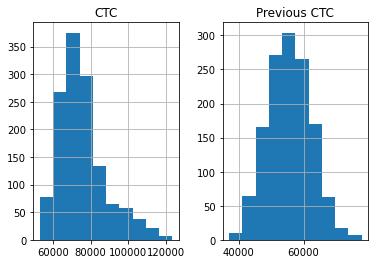

In [19]:
viz = data[['CTC','Previous CTC']]
viz.hist()
plt.show()

<BarContainer object of 1338 artists>

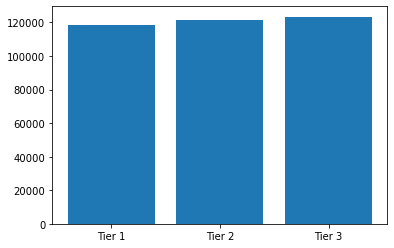

In [20]:
plt.bar(original_data['College'], original_data['CTC'])

<BarContainer object of 1338 artists>

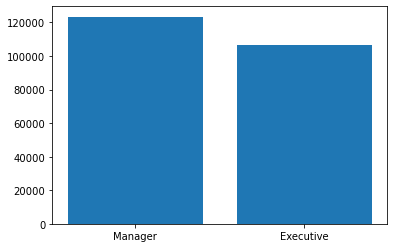

In [21]:
plt.bar(original_data['Role'], original_data['CTC'])

D:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City type', ylabel='CTC'>

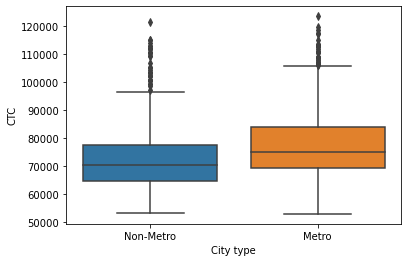

In [22]:
sns.boxplot(original_data['City type'], original_data['CTC'])

D:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='CTC'>

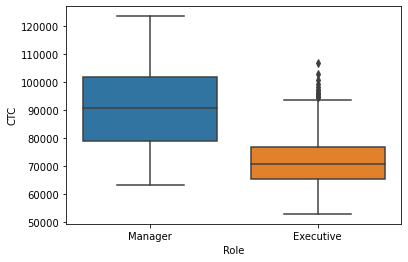

In [23]:
sns.boxplot(original_data['Role'], original_data['CTC'])

D:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='College', ylabel='CTC'>

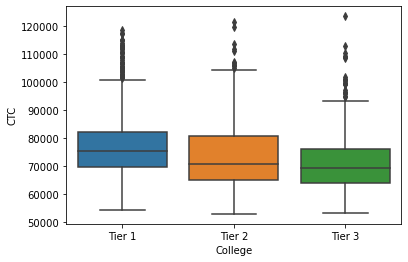

In [24]:
sns.boxplot(original_data['College'], original_data['CTC'])

D:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='College', ylabel='count'>

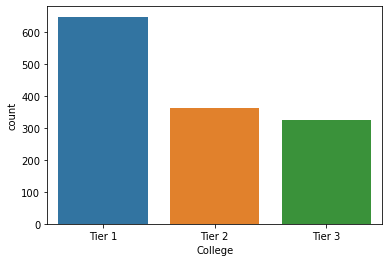

In [25]:
sns.countplot("College", data=original_data)

D:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Role', ylabel='count'>

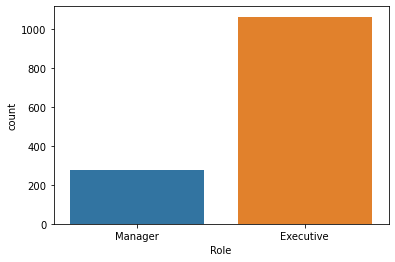

In [26]:
sns.countplot("Role", data=original_data)

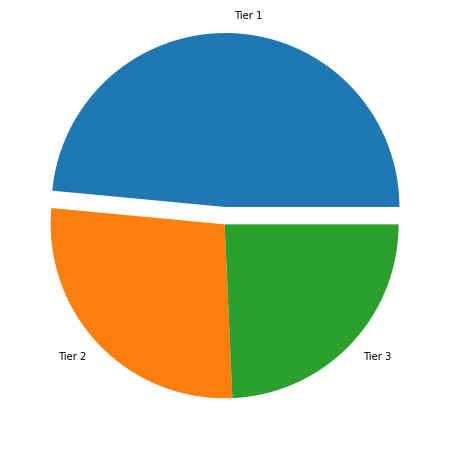

In [27]:
df = original_data.groupby('College').size()
df.plot(kind='pie', subplots=True, figsize=(8, 8), explode=[0.1,0,0])
plt.ylabel("")
plt.show()

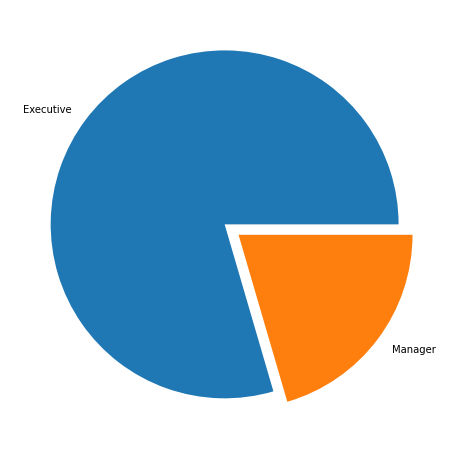

In [28]:
df = original_data.groupby('Role').size()
df.plot(kind='pie', subplots=True, figsize=(8, 8), explode=[0,0.1])
plt.ylabel("")
plt.show()

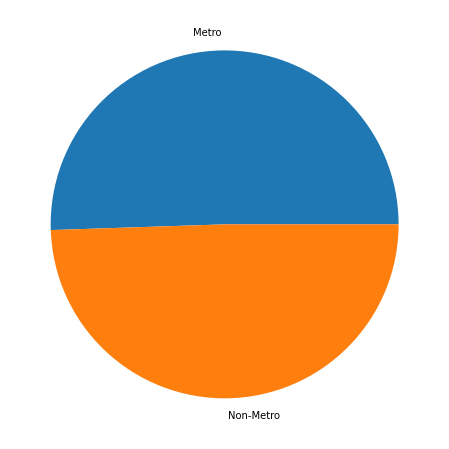

In [29]:
df = original_data.groupby('City type').size()
df.plot(kind='pie', subplots=True, figsize=(8, 8), explode=[0,0])
plt.ylabel("")
plt.show()

# Training Model For Linear Regression With Feature Extraction

In [30]:
xtrain = data[['Exp (Months)', 'Previous CTC','Graduation marks']]
xtest = test_data[['Exp','previous CTC','Graduation marks']]

In [31]:
Xtrain = scaler.fit_transform(xtrain)
Xtest = scaler.fit_transform(xtest)

In [32]:
Ytrain = data['CTC']
Ytest = test_data['Actual CTC']

# Fitting Model

In [33]:
regr.fit(Xtrain, Ytrain)

LinearRegression()

In [34]:
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [3441.03416064 2992.42615749  116.02899717]
Intercept:  75459.33899340554


# Predicted CTC

In [35]:
Ytest_pred = regr.predict(Xtest)

In [36]:
Final = pd.DataFrame({'Actual CTC': Ytest, 'Predicted CTC': Ytest_pred})
print(Final)

        Actual CTC  Predicted CTC
0     71406.576531   70529.798142
1     68005.870631   71122.674221
2     76764.020277   74785.744177
3     82092.386880   71160.509942
4     73878.097729   74832.138285
...            ...            ...
1333  69712.403655   79993.392646
1334  69298.750099   69482.587299
1335  66397.770686   73017.616291
1336  64044.382949   70004.384816
1337  83346.060961   79013.918670

[1338 rows x 2 columns]


# Model Evaluation

In [37]:
MSE = np.mean((Ytest_pred - Ytest) ** 2)
print("Residual sum of squares: %.2f" % MSE)
print('Root Mean Squared Error:', np.sqrt(MSE))
print('Variance score: %.2f' % regr.score(Xtest, Ytest))
print("R2 : ",r2_score(Ytest, Ytest_pred))

Residual sum of squares: 134275913.60
Root Mean Squared Error: 11587.748426638562
Variance score: 0.15
R2 :  0.1470044457168589


D:\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


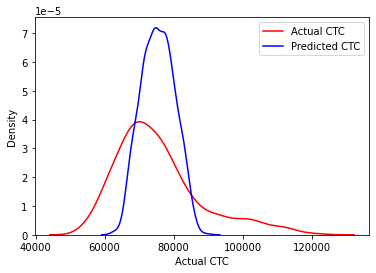

In [38]:
ax1 = sns.distplot(Ytest, hist=False, color="r", label="Actual CTC")
sns.distplot(Ytest_pred, hist=False, color="b", label="Predicted CTC" , ax=ax1)
plt.legend()
plt.show()

D:\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual CTC'>

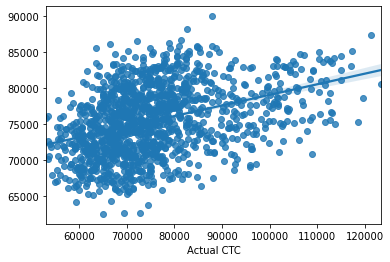

In [39]:
sns.regplot(Ytest, Ytest_pred)

# Final Dataset with Predicted CTC

In [40]:
Output = pd.concat([test_data, pd.DataFrame(Ytest_pred, columns=["Predicted CTC"])], axis=1)

# Export The Final Excel File 

In [41]:
file_name = 'Test_Data.xlsx'
# saving the excel file
Output.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
